In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [3]:
#Task 1
def lagger(t, n, B=2, O=4):
    if B<0 or B>O:
        raise ValueError("Wrong parameters")

    lpprev=np.sqrt(O)*np.exp(-B*t/2)
    lp=np.sqrt(O)*(1-O*t)*np.exp(-B*t/2)

    if n==0:
        return lpprev
    if n==1:
        return lp

    for i in range(2, int(n+1)):
        temp=lp
        lp=(2*i-1-O*t)*lp/i-(i-1)*lpprev/i
        lpprev=temp

    return lp

In [4]:
lagger(3,5)

2.728331346558944

In [5]:
#Task 2
def tabulate_lagger(T, n, B=2, O=4, num_points=200):
    points=np.linspace(0, T, num_points)
    results=lagger(points,n,B,O)
    ns=[n]*num_points;
    df=pd.DataFrame({'t': points, 'n' : ns, 'lagger': results})
    return df

In [6]:
tabulated_lagger_df = tabulate_lagger(10, 5)

In [7]:
tabulated_lagger_df

,t,n,lagger
0,0.000000,5,2.000000
1,0.050251,5,0.349569
2,0.100503,5,-0.551527
3,0.150754,5,-0.921144
4,0.201005,5,-0.932186
...,...,...,...
195,9.798995,5,-41.308428
196,9.849246,5,-40.474917
197,9.899497,5,-39.651045
198,9.949749,5,-38.836997


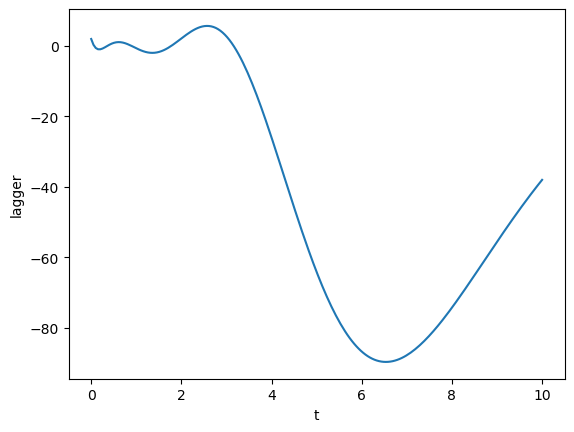

In [119]:
plt.plot(tabulated_lagger_df['t'],tabulated_lagger_df['lagger'])
plt.xlabel('t')
plt.ylabel('lagger')

In [7]:
#Task 3
def experiment(T,N=20):
    t = np.linspace(0, T, 1000)
    for i in t:
        for n in np.linspace(0, N, N+1):
            if abs(lagger(i,n))<0.001:
                flag = True
            else:
                flag = False
                break
        if flag:
            iss=[i]*(N+1)
            laggers = []
            ns = []
            for n in np.linspace(0, N, N+1):
                laggers.append(lagger(i,n))
                ns.append(n)
            df = pd.DataFrame({'t' : iss, 'n' : ns, 'lagger' : laggers})
            return df, i
            break


In [8]:
df, ans = experiment(100)

In [9]:
df

,t,n,lagger
0,79.079079,0.0,9.066138e-35
1,79.079079,1.0,-2.858701e-32
2,79.079079,2.0,4.478343e-30
3,79.079079,3.0,-4.647081e-28
4,79.079079,4.0,3.593209e-26
5,79.079079,5.0,-2.208132e-24
6,79.079079,6.0,1.123332e-22
7,79.079079,7.0,-4.865604e-21
8,79.079079,8.0,1.831625e-19
9,79.079079,9.0,-6.087176e-18


In [10]:
ans

79.07907907907908

In [11]:
#plot_lagger(ans,20)

In [12]:
#Task 4
def lagger_transformation(f, T, k, B=2, O=4, steps=1000, eps=0.0001):
    alpha=O-B
    res1 = sum([f(i)*lagger(i, k)*np.exp(-alpha*i) for i in np.linspace(0, T, steps)]) * T / steps
    steps *=2
    res2 = sum([f(i)*lagger(i, k)*np.exp(-alpha*i) for i in np.linspace(0, T, steps)]) * T / steps

    while abs(res2 - res1) >= eps:
        res1 = res2
        steps *= 2
        res2 = sum([f(i)*lagger(i, k)*np.exp(-alpha*i) for i in np.linspace(0, T, steps)]) * T / steps
    return res2

In [66]:
#Task 5
def f(x):
    if x>=2*np.pi:
        return 0
    else:
        return np.sin(x-np.pi/2)+1

In [70]:
def lagger_transformation_coefficients(f, T, N):
    ns = np.linspace(0, N, N+1)
    results = []
    for i in ns:
        results.append(lagger_transformation(f,T,i))
    df = pd.DataFrame({'N' : ns, 'f' : results})
    return df

In [71]:
#Task 6
def lagger_inverse_transformation(H, t, k, B=2, O=4):
    res = 0
    for i in range(k+1):
        res += (H[i]*lagger(t,i))
    return res

In [126]:
#Task 7
def plot_lagger(T, N, B=2, O=4):
    plt.figure(figsize=(10, 8))
    n = np.linspace(0, N, N+1)
    for i in n:
        plt.plot(tabulate_lagger(T,i,B,O)['t'],tabulate_lagger(T,i,B,O)['lagger'],label=f"n={i}")
    plt.legend(loc='upper left')
    plt.xlabel('t')
    plt.ylabel('lagger')
    plt.grid(True)
    plt.show()

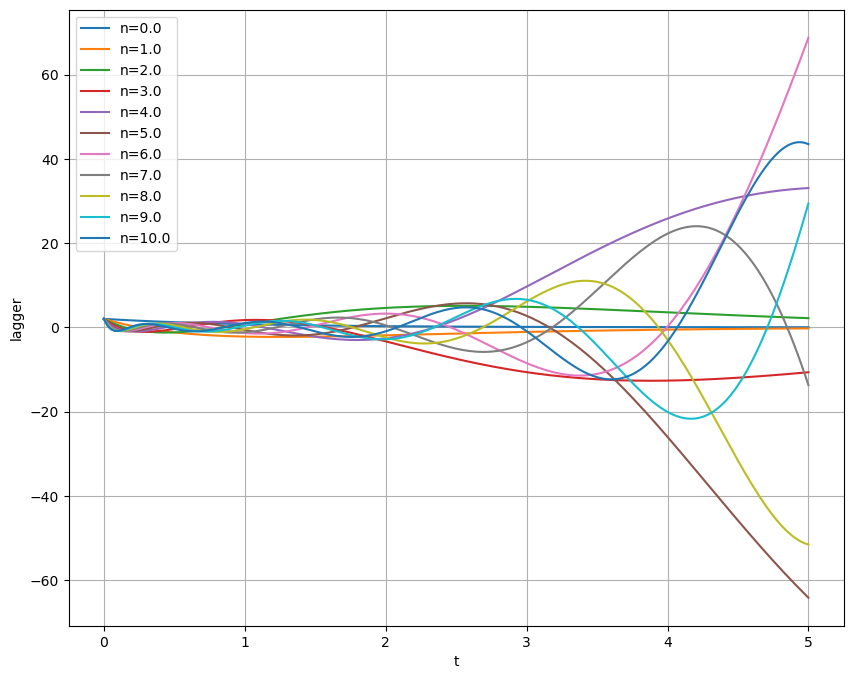

In [127]:
plot_lagger(5, 10)

In [74]:
#Task 8
lagger_transformation_coefficients(f, ans, 20)

,N,f
0,0.0,0.066633
1,1.0,-0.182131
2,2.0,0.177985
3,3.0,-0.074253
4,4.0,0.007259
5,5.0,0.007584
6,6.0,-0.003096
7,7.0,-0.000615
8,8.0,0.000798
9,9.0,-0.000027


In [75]:
#add bar graph

In [76]:
lagger_inverse_transformation(lagger_transformation_coefficients(f, ans, 20)['f'], np.pi, 20)

1.9989452575192153

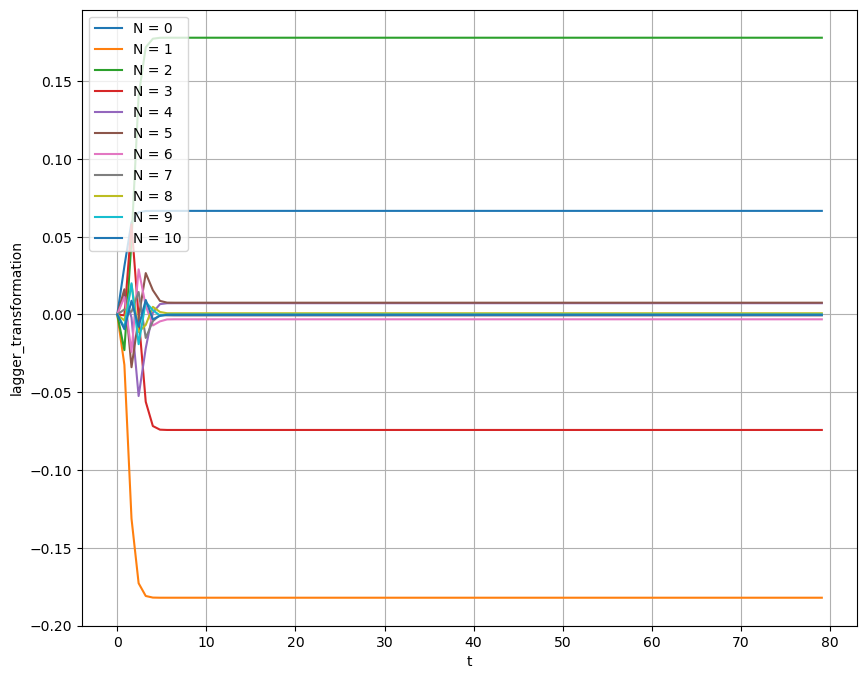

In [122]:
N=10
plt.figure(figsize=(10, 8))
ts = np.linspace(0,ans, 100)
for n in range(N+1):
    results = []
    for i in ts:
        results.append(lagger_transformation(f,i,n))
    plt.plot(ts,results,label=f"N = {n}")
plt.legend(loc='upper left')
plt.xlabel('t')
plt.ylabel('lagger_transformation')
plt.grid(True)

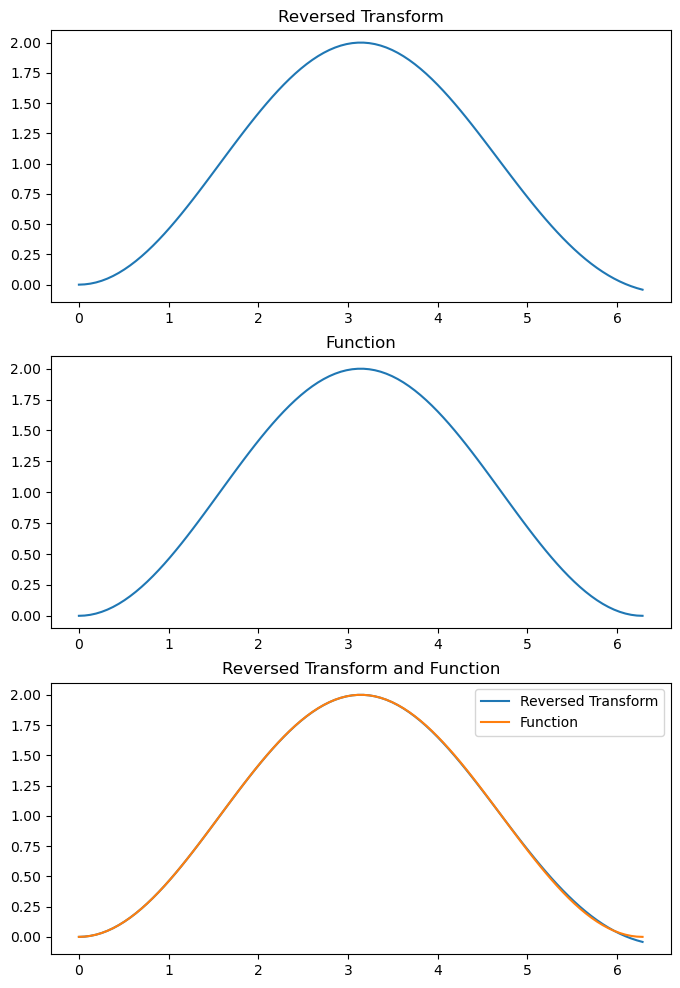

In [132]:
transforms = lagger_transformation_coefficients(f,ans,10)['f']
reversed_transform_vals = []
fun_vals = []
for t in np.linspace(0, (2*np.pi), 100):
    reversed_transform_vals.append(lagger_inverse_transformation(transforms, t, 10))
    fun_vals.append(f(t))

fig, (p1,p2,p3) = plt.subplots(3, 1,figsize=(8,12))
p1.plot(np.linspace(0, (2*np.pi), 100), reversed_transform_vals)
p2.plot(np.linspace(0, (2*np.pi), 100), fun_vals)
p3.plot(np.linspace(0, (2*np.pi), 100), reversed_transform_vals, 
    label='Reversed Transform')
p3.plot(np.linspace(0, (2*np.pi), 100), fun_vals, label='Function')
p1.set_title('Reversed Transform')
p2.set_title('Function')
p3.set_title('Reversed Transform and Function')
p3.legend()
plt.savefig("Task_8_1.png")
plt.show()

In [79]:
def my_fun(x):
    return x**3

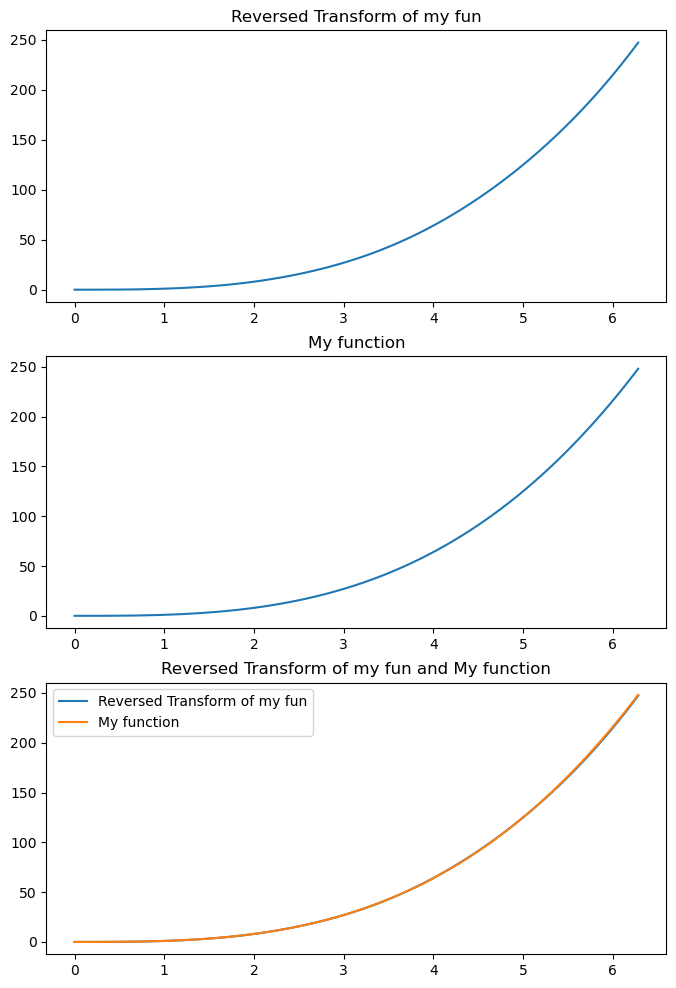

In [129]:
my_transforms = lagger_transformation_coefficients(my_fun,ans,10)['f']
my_reversed_transform_vals = []
my_fun_vals = []
for t in np.linspace(0, (2*np.pi), 100):
    my_reversed_transform_vals.append(lagger_inverse_transformation(my_transforms, t, 10))
    my_fun_vals.append(my_fun(t))
    
fig, (p1,p2,p3) = plt.subplots(3, 1,figsize=(8,12))
p1.plot(np.linspace(0, (2*np.pi), 100), my_reversed_transform_vals)
p2.plot(np.linspace(0, (2*np.pi), 100), my_fun_vals)
p3.plot(np.linspace(0, (2*np.pi), 100), my_reversed_transform_vals, label='Reversed Transform of my fun')
p3.plot(np.linspace(0, (2*np.pi), 100), my_fun_vals, label='My function')
p1.set_title('Reversed Transform of my fun')
p2.set_title('My function')
p3.set_title('Reversed Transform of my fun and My function')
p3.legend()
plt.savefig("Task_8_2.png")
plt.show()

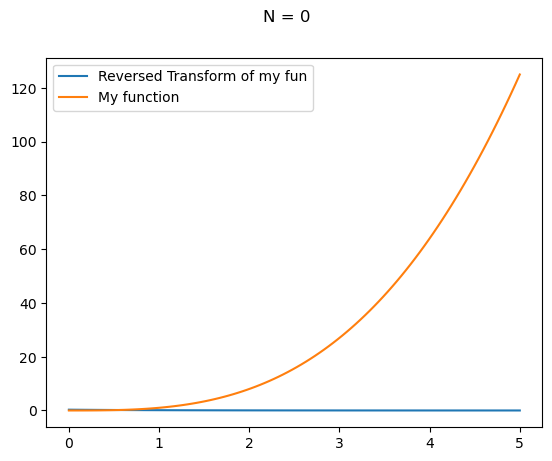

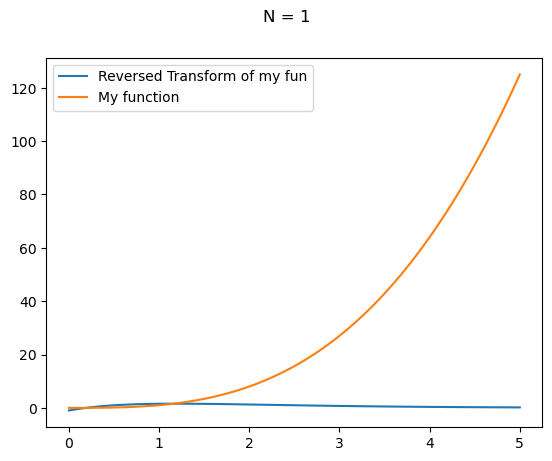

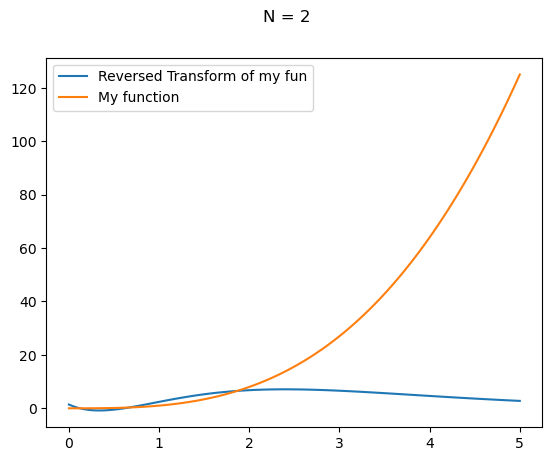

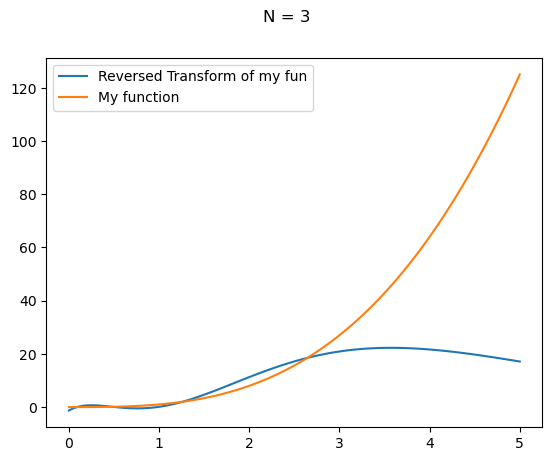

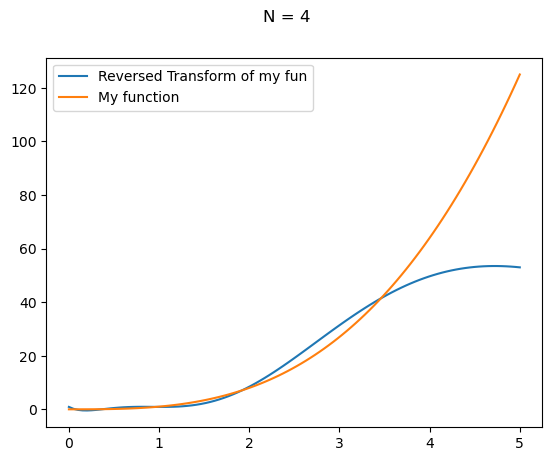

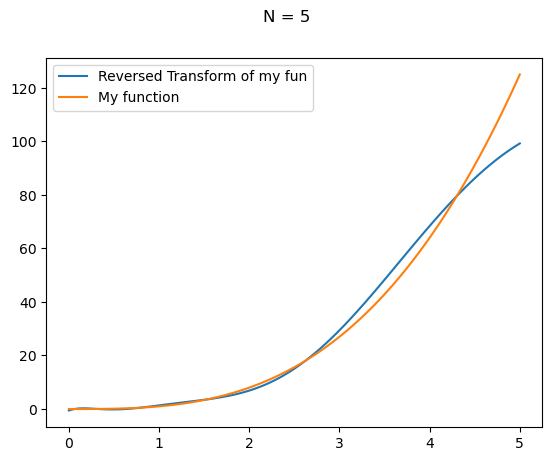

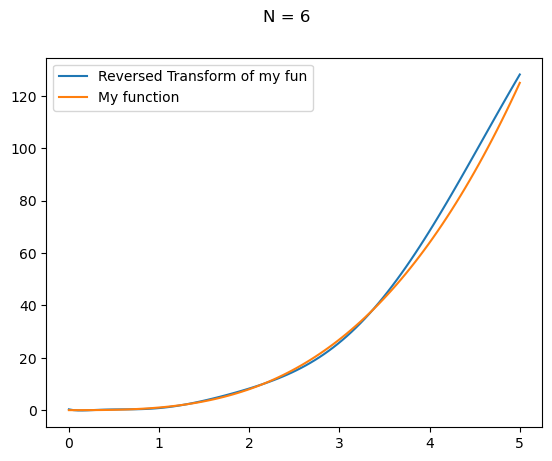

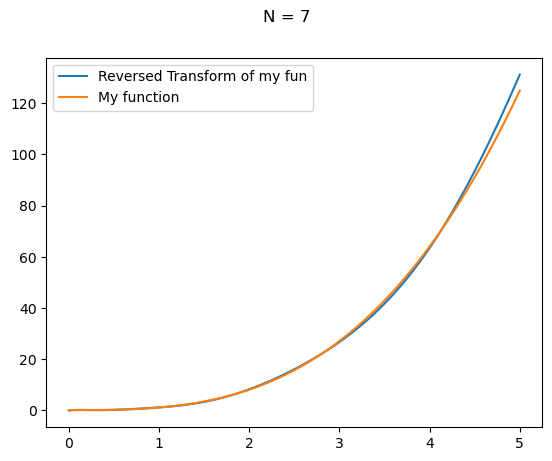

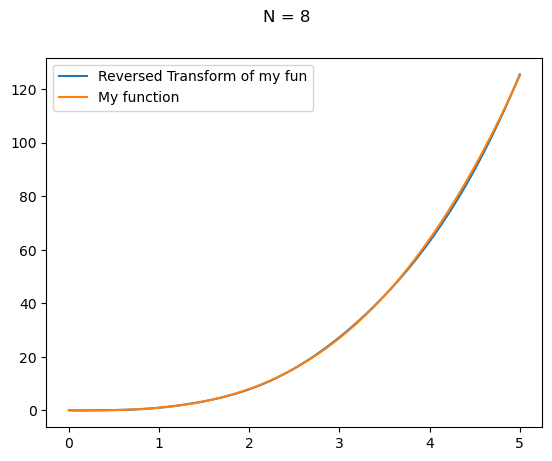

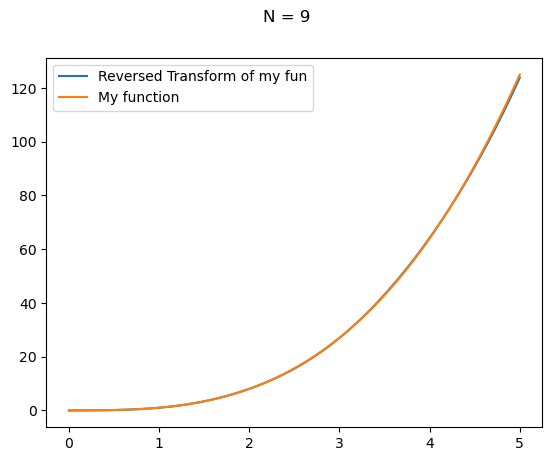

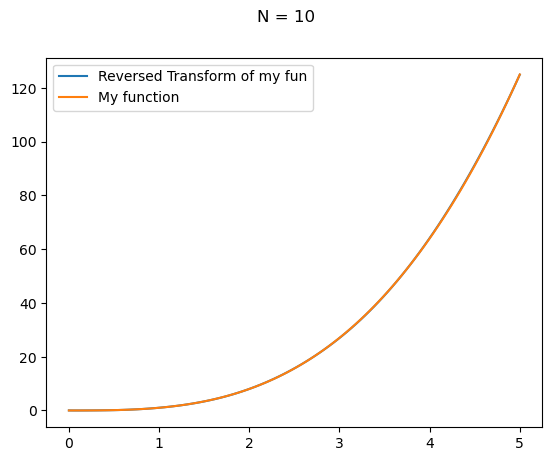

In [130]:
for k in range(0, 11):
    my_transforms = lagger_transformation_coefficients(my_fun,ans,k)['f']
    my_reversed_transform_vals = []
    my_fun_vals = []
    for t in np.linspace(0, 5, 100):
        my_reversed_transform_vals.append(lagger_inverse_transformation(my_transforms, t, k))
        my_fun_vals.append(my_fun(t))
    plt.plot(np.linspace(0, 5, 100), my_reversed_transform_vals, label='Reversed Transform of my fun')
    plt.plot(np.linspace(0, 5, 100), my_fun_vals, label='My function')
    plt.legend()
    plt.suptitle(f'N = {k}')
    plt.savefig(f"Task_8_3_{k}.png")
    plt.show()